In [148]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [149]:
{
    1: "prare data and load",
    2: "build a model",
    3: "fit the model to the data",
    4: "Saving and loading the model",
    5: 'Putting it all together'
}

{1: 'prare data and load',
 2: 'build a model',
 3: 'fit the model to the data',
 4: 'Saving and loading the model',
 5: 'Putting it all together'}

In [150]:
torch.__version__

'2.7.1+cpu'

# 1

In [151]:
weight = 0.7
bias = 0.3

In [152]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)


In [153]:
y = weight *X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [154]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


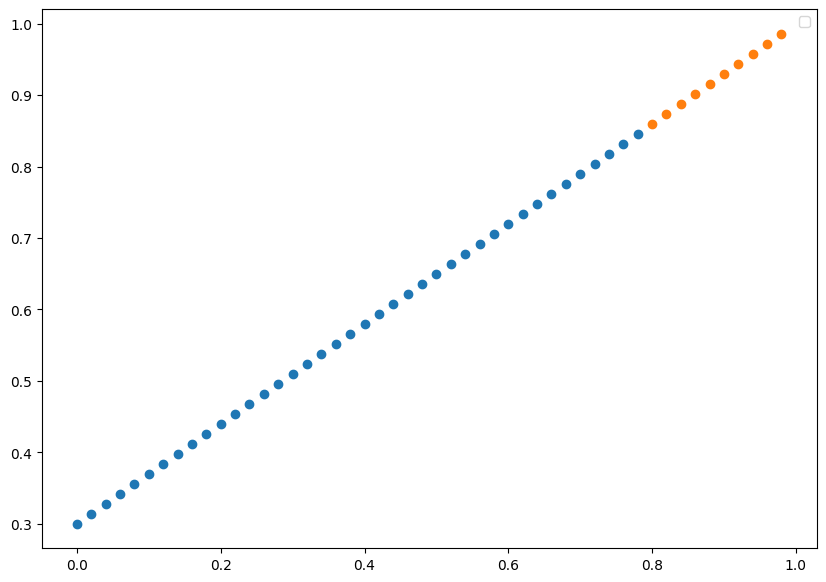

In [155]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels)
    plt.scatter(test_data,test_labels)
    if predictions is not None:
        plt.scatter(test_data,predictions)
    plt.legend()
    
plot_predictions()

# 2

In [156]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype= torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x):
            return self.weights * x + self.bias


In [157]:
torch.manual_seed(42)
model_0 = LinearModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [158]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [159]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


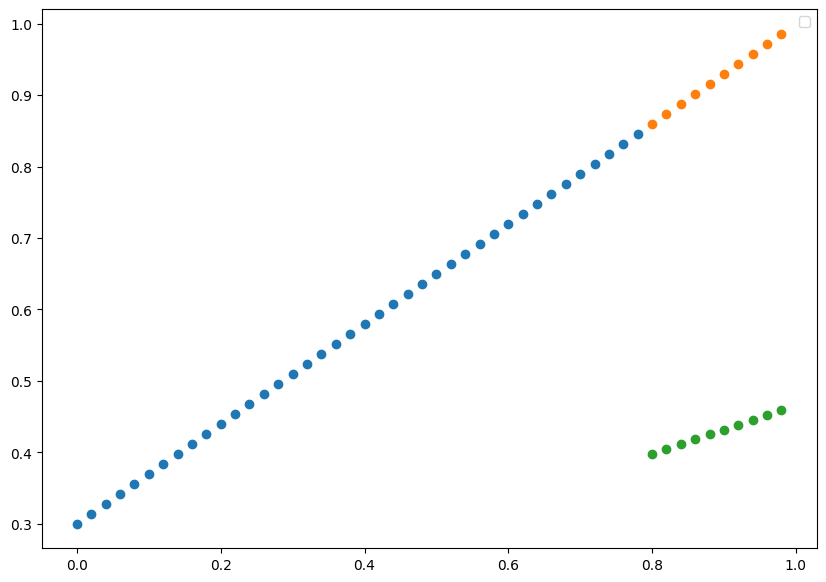

In [160]:
plot_predictions(predictions=y_preds)

# 3

In [161]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [165]:
torch.manual_seed(42)
epochs = 100

for i in range(epochs):

    model_0.train()

    y_preds = model_0(X_train)
    loss = loss_fn(y_train,y_preds)
    # print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
    if i % 10 == 0:
        print(f"Epoch : {i} | Loss : {loss} | Test Loss : {test_loss}")
        print(model_0.state_dict())


Epoch : 0 | Loss : 0.024458957836031914 | Test Loss : 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch : 10 | Loss : 0.021020207554101944 | Test Loss : 0.04819049686193466
OrderedDict([('weights', tensor([0.5972])), ('bias', tensor([0.3433]))])
Epoch : 20 | Loss : 0.01758546568453312 | Test Loss : 0.04060482233762741
OrderedDict([('weights', tensor([0.6141])), ('bias', tensor([0.3358]))])
Epoch : 30 | Loss : 0.014155393466353416 | Test Loss : 0.03233227878808975
OrderedDict([('weights', tensor([0.6313])), ('bias', tensor([0.3288]))])
Epoch : 40 | Loss : 0.010716589167714119 | Test Loss : 0.024059748277068138
OrderedDict([('weights', tensor([0.6485])), ('bias', tensor([0.3218]))])
Epoch : 50 | Loss : 0.0072835334576666355 | Test Loss : 0.016474086791276932
OrderedDict([('weights', tensor([0.6654])), ('bias', tensor([0.3143]))])
Epoch : 60 | Loss : 0.0038517764769494534 | Test Loss : 0.008201557211577892
OrderedDict([('weights', tensor([0

In [166]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


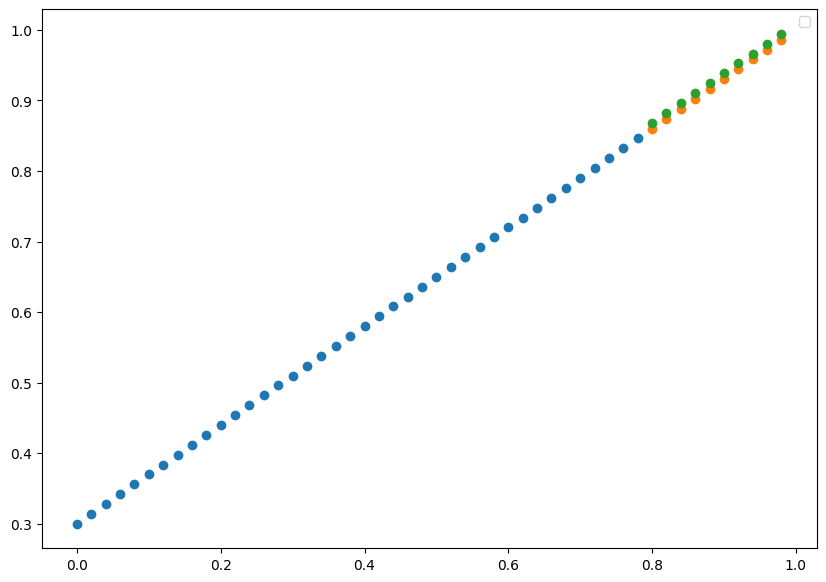

In [167]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)